In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [9]:
path = "Mall Customers.csv" 
df = pd.read_csv(path)

In [10]:
features = ["Age","Annual Income (k$)","Spending Score (1-100)"]  #
X = df[features].copy()
X = X.fillna(X.median())  # safety
X_scaled = StandardScaler().fit_transform(X)

In [11]:
features = ["Age","Annual Income (k$)","Spending Score (1-100)"]  #
X = df[features].copy()
X = X.fillna(X.median())  # safety
X_scaled = StandardScaler().fit_transform(X)

In [12]:
cands = range(2,7)  # 2..6 is enough for this dataset
sils = []
for k in cands:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    sils.append(silhouette_score(X_scaled, km.labels_))
best_k = cands[int(np.argmax(sils))]
print("Best k (silhouette):", best_k)

Best k (silhouette): 6


In [13]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X_scaled)
df["Cluster"] = kmeans.labels_
print("Cluster counts:\n", df["Cluster"].value_counts().sort_index())

Cluster counts:
 Cluster
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64


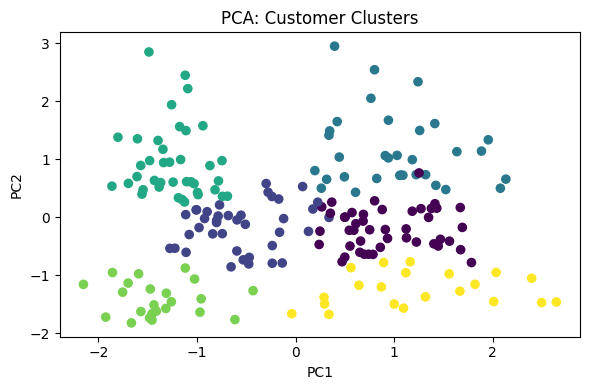

In [14]:
pcs = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
plt.figure(figsize=(6,4))
plt.scatter(pcs[:,0], pcs[:,1], c=df["Cluster"], s=35)
plt.title("PCA: Customer Clusters"); plt.xlabel("PC1"); plt.ylabel("PC2"); plt.tight_layout(); plt.show()

In [15]:
profile = df.groupby("Cluster")[features].mean().round(1)
print("\nCluster profile (means):\n", profile)


Cluster profile (means):
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        56.3                54.3                    49.1
1        26.8                57.1                    48.1
2        41.9                88.9                    17.0
3        32.7                86.5                    82.1
4        25.0                25.3                    77.6
5        45.5                26.3                    19.4


In [16]:
def name_seg(row):
    inc, spend = row["Annual Income (k$)"], row["Spending Score (1-100)"]
    if inc>=60 and spend>=60: return "VIP / High-Value"
    if inc>=60 and spend<50:  return "Potential (High Income, Low Spend)"
    if inc<60  and spend>=60: return "Trend-Seeker"
    if inc<50  and spend<45:  return "Budget"
    return "Regular"

seg_names = profile.apply(name_seg, axis=1).to_dict()
df["Segment"] = df["Cluster"].map(seg_names)
print("\nSegment names per cluster:\n", seg_names)

strategies = {
 "VIP / High-Value": ["Exclusive offers","Early access","Premium bundles"],
 "Potential (High Income, Low Spend)": ["Intro discounts","Quality guarantees","Trial of premium"],
 "Trend-Seeker": ["Flash sales","New arrivals focus","Gamified rewards"],
 "Budget": ["Value packs","Coupons/price breaks","Loyalty points"],
 "Regular": ["Seasonal promos","Lifecycle emails","A/B test offers"]
}
print("\nStrategies (by segment):")
for c, name in seg_names.items():
    print(f"[Cluster {c}: {name}] -> {', '.join(strategies.get(name, ['Generic nurture']))}")


Segment names per cluster:
 {0: 'Regular', 1: 'Regular', 2: 'Potential (High Income, Low Spend)', 3: 'VIP / High-Value', 4: 'Trend-Seeker', 5: 'Budget'}

Strategies (by segment):
[Cluster 0: Regular] -> Seasonal promos, Lifecycle emails, A/B test offers
[Cluster 1: Regular] -> Seasonal promos, Lifecycle emails, A/B test offers
[Cluster 2: Potential (High Income, Low Spend)] -> Intro discounts, Quality guarantees, Trial of premium
[Cluster 3: VIP / High-Value] -> Exclusive offers, Early access, Premium bundles
[Cluster 4: Trend-Seeker] -> Flash sales, New arrivals focus, Gamified rewards
[Cluster 5: Budget] -> Value packs, Coupons/price breaks, Loyalty points


In [17]:
df.to_csv("mall_segments_short.csv", index=False)
print("Saved: mall_segments_short.csv")

Saved: mall_segments_short.csv


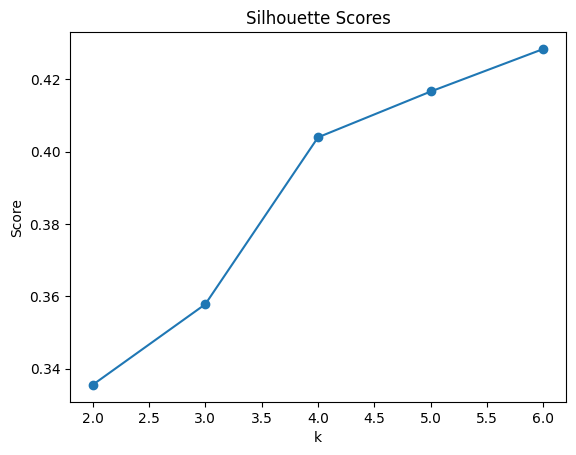

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sils = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    sils.append((k, silhouette_score(X_scaled, km.labels_)))

plt.plot([k for k,_ in sils], [s for _,s in sils], marker="o")
plt.title("Silhouette Scores"); plt.xlabel("k"); plt.ylabel("Score")
plt.show()

In [22]:
import os
print(os.getcwd())

C:\Users\ait
